In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier

In [6]:
df=pd.read_csv('Student Depression Dataset.csv',index_col=0)
df

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,,
2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0


<Axes: >

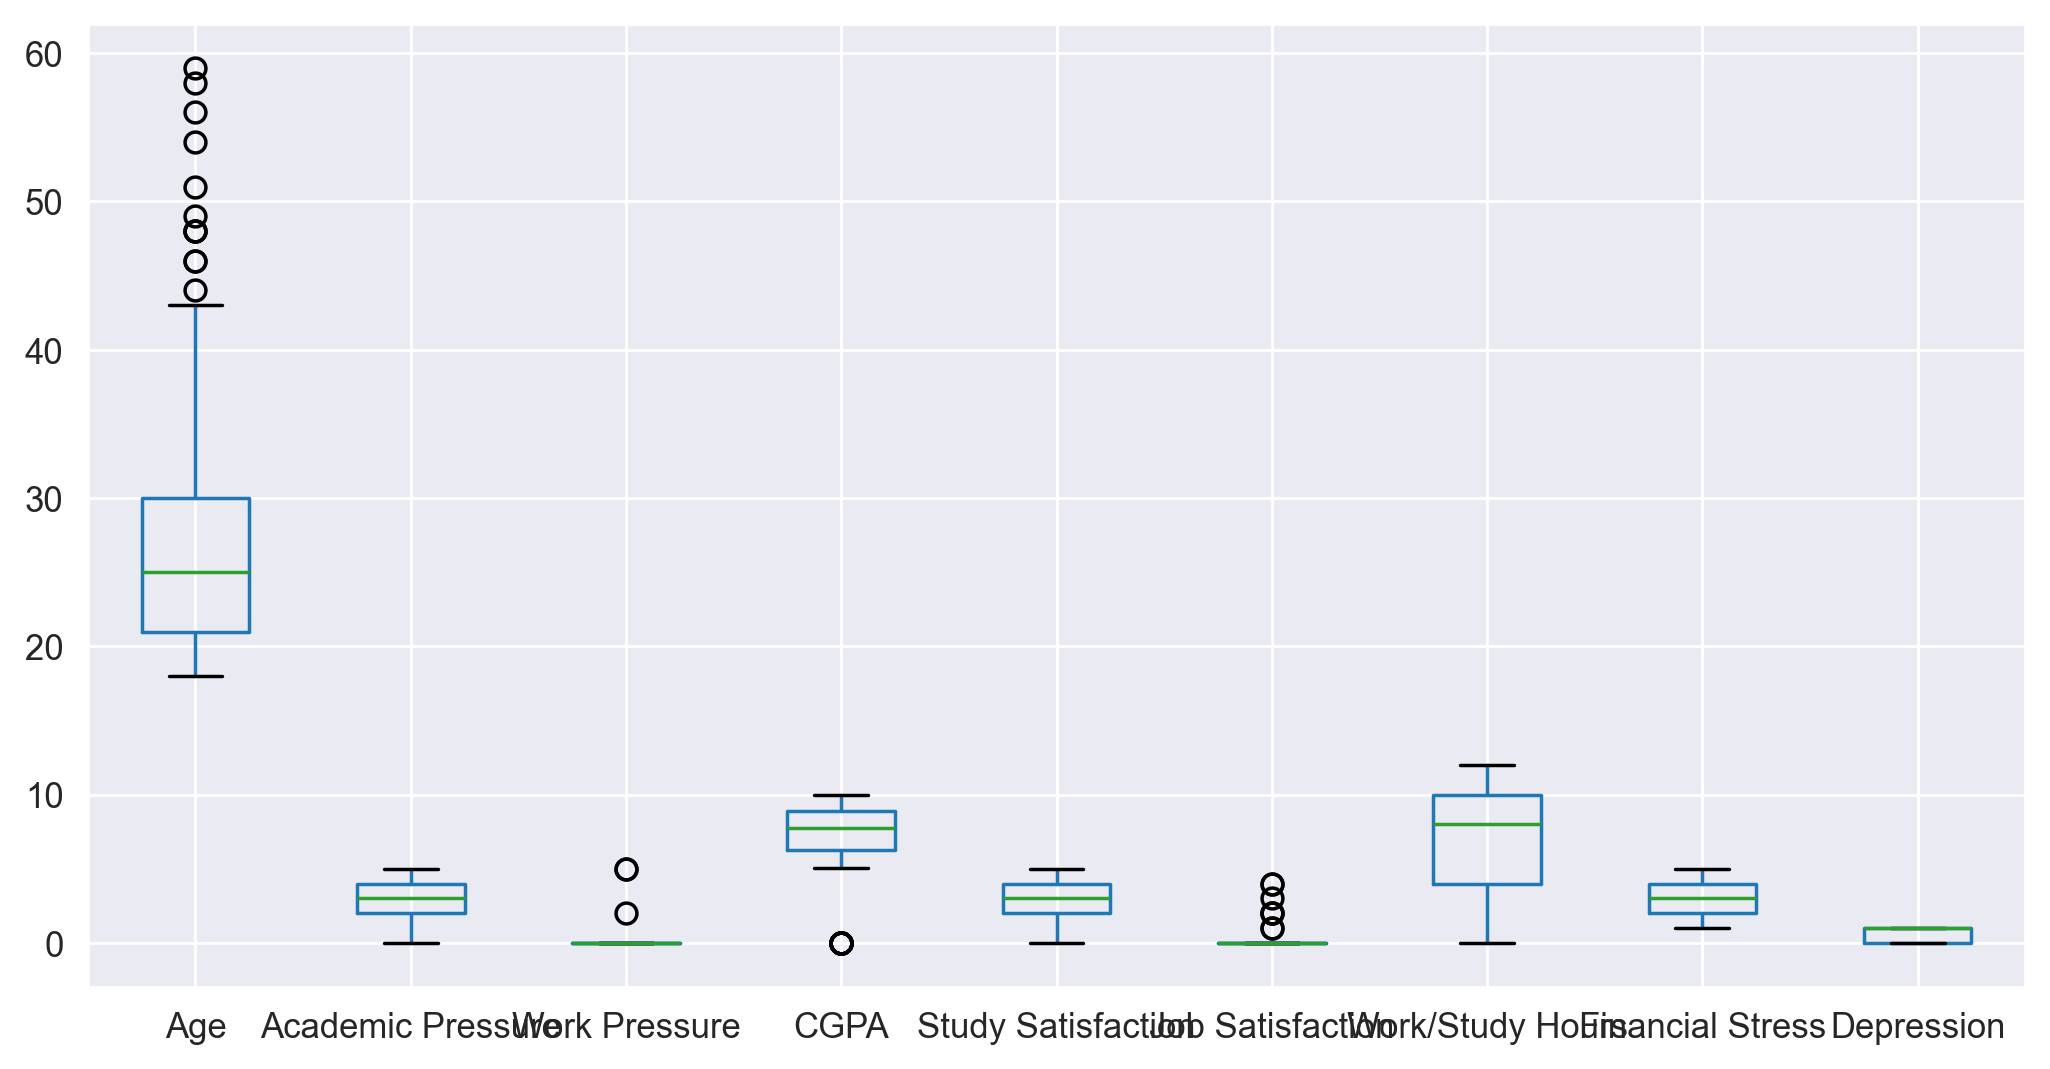

In [7]:
df.boxplot()

In [8]:
df.isna().sum()

Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [9]:
df['Financial Stress'].fillna(df['Financial Stress'].median(),inplace=True)

In [10]:
df.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139852,0.585499
std,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437270,0.492645
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [11]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder


In [12]:
# Columns to encode
columns_to_encode = ['Gender', 'City', 'Profession', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?','Sleep Duration','Family History of Mental Illness']

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the data
df[columns_to_encode] = encoder.fit_transform(df[columns_to_encode])

# Display the DataFrame with encoded columns
print(df)


        Gender   Age  City  Profession  Academic Pressure  Work Pressure  \
id                                                                         
2          1.0  33.0  51.0        11.0                5.0            0.0   
8          0.0  24.0   3.0        11.0                2.0            0.0   
26         1.0  31.0  44.0        11.0                3.0            0.0   
30         0.0  28.0  49.0        11.0                3.0            0.0   
32         0.0  25.0  16.0        11.0                4.0            0.0   
...        ...   ...   ...         ...                ...            ...   
140685     0.0  27.0  45.0        11.0                5.0            0.0   
140686     1.0  27.0  25.0        11.0                2.0            0.0   
140689     1.0  31.0   9.0        11.0                3.0            0.0   
140690     0.0  18.0  25.0        11.0                5.0            0.0   
140699     1.0  27.0  38.0        11.0                4.0            0.0   

        CGP

In [40]:
df

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,,
2,1.0,33.0,51.0,11.0,5.0,0.0,8.97,2.0,0.0,0.0,0.0,3.0,1.0,3.0,1.0,0.0,1
8,0.0,24.0,3.0,11.0,2.0,0.0,5.90,5.0,0.0,0.0,1.0,10.0,0.0,3.0,2.0,1.0,0
26,1.0,31.0,44.0,11.0,3.0,0.0,7.03,5.0,0.0,2.0,0.0,5.0,0.0,9.0,1.0,1.0,0
30,0.0,28.0,49.0,11.0,3.0,0.0,5.59,2.0,0.0,1.0,1.0,7.0,1.0,4.0,5.0,1.0,1
32,0.0,25.0,16.0,11.0,4.0,0.0,8.13,3.0,0.0,0.0,1.0,17.0,1.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140685,0.0,27.0,45.0,11.0,5.0,0.0,5.75,5.0,0.0,0.0,3.0,11.0,1.0,7.0,1.0,1.0,0
140686,1.0,27.0,25.0,11.0,2.0,0.0,9.40,3.0,0.0,2.0,0.0,25.0,0.0,0.0,3.0,1.0,0
140689,1.0,31.0,9.0,11.0,3.0,0.0,6.61,4.0,0.0,0.0,3.0,22.0,0.0,12.0,2.0,0.0,0


In [13]:
x = df.iloc[:,:-1]
y = df['Depression']

In [14]:
sc=StandardScaler()

In [15]:
x=sc.fit_transform(x)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
def prediction(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)

    print(f"Train Accuracy: {model.score(xtrain,ytrain)}")
    print(f"Test Accuracy: {model.score(xtest,ytest)}")
    print(classification_report(ytest,ypred))

In [20]:
prediction(GradientBoostingClassifier())

Train Accuracy: 0.8555555555555555
Test Accuracy: 0.8378426805232038
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2343
           1       0.85      0.88      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



In [21]:
prediction(XGBClassifier())

Train Accuracy: 0.9258064516129032
Test Accuracy: 0.8260168428597026
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      2343
           1       0.84      0.86      0.85      3238

    accuracy                           0.83      5581
   macro avg       0.82      0.82      0.82      5581
weighted avg       0.83      0.83      0.83      5581

